In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_credit = pd.read_csv(r'C:\Users\Gian\Documents\Coding\ML_Basics\Naive_Bayes\credit_risk_dataset.csv')

In [3]:
df_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df_credit[df_credit['person_age'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [6]:
df_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

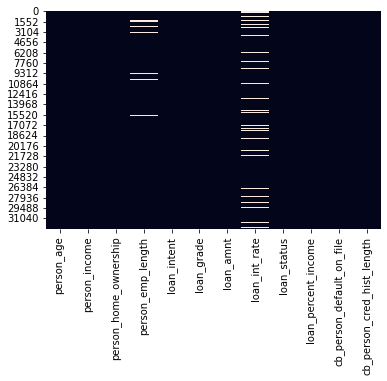

In [7]:
sns.heatmap(df_credit.isnull(), cbar=False)


The total of null data represents about 10% of the whole dataset, so it's ok to delete it

In [8]:
df_credit.dropna(axis=1,inplace=True)

Checking correlations in the dataset

<AxesSubplot:>

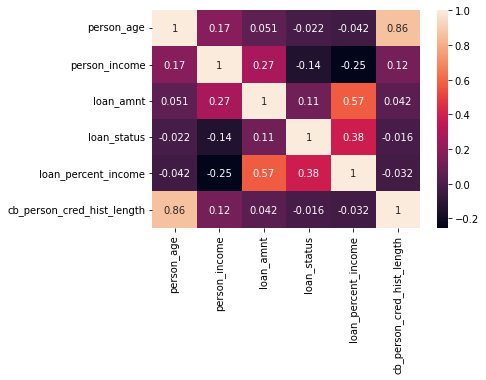

In [9]:
sns.heatmap(df_credit.corr(), annot=True)

In [10]:
df_credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Checking the values of certain columns for labelling

In [11]:
values_unique = ['person_home_ownership','loan_intent','loan_grade', 'cb_person_default_on_file']

for i in range(0,3):
    print(df_credit[values_unique[i]].value_counts())

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64


In [12]:
df_credit[values_unique].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

Labelling the columns with only 2 values with binary and the other ones with LabelEncoder 

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_credit.drop('loan_status', axis=1),df_credit['loan_status'], test_size=0.3)

In [16]:
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
encoding_pipeline = Pipeline([
('encode_unique_more2', ce.OrdinalEncoder(cols=['person_home_ownership', 'loan_intent', 'loan_grade'], return_df=True)),
('encode_unique_binary', ce.BaseNEncoder(cols=['cb_person_default_on_file'], return_df=True))
])





X_train = encoding_pipeline.fit_transform(X_train)
X_test = encoding_pipeline.fit_transform(X_test)

X_test

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
31171,42,62900,2,1,2,3000,0.04,0,1,14
26896,30,117500,2,2,1,13500,0.11,0,1,7
26842,27,115000,2,6,1,5000,0.04,0,1,6
461,21,18000,3,3,3,6250,0.35,0,1,4
26065,31,95000,2,6,3,25000,0.26,0,1,6
...,...,...,...,...,...,...,...,...,...,...
15942,26,8400,1,2,1,3500,0.42,0,1,3
18511,29,14400,1,2,4,1000,0.07,1,0,8
252,24,85000,1,1,3,25000,0.29,0,1,4
11289,22,73000,2,3,4,12000,0.16,1,0,2


In [18]:
X_train

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
17215,22,40800,1,1,1,2000,0.05,0,1,2
26883,33,116000,2,2,2,15000,0.13,0,1,7
13413,21,91000,2,3,3,20000,0.22,0,1,2
20983,30,45000,1,1,2,5000,0.11,1,0,8
24773,35,80004,1,2,1,10000,0.12,0,1,10
...,...,...,...,...,...,...,...,...,...,...
20648,28,28800,1,3,3,5000,0.17,0,1,9
13478,25,17352,1,5,3,2500,0.14,0,1,4
31723,38,126000,2,2,4,2400,0.02,1,0,14
15330,24,130000,2,4,1,15000,0.12,0,1,4


In [19]:
col_names = ['person_income', 'person_age', 'loan_amnt']

def standardize(dataset):
    features = dataset[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    dataset[col_names] = features
    return dataset

In [20]:
X_train_std = standardize(X_train)
X_test_std = standardize(X_test)

In [21]:
X_test_std

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
31171,2.268813,-0.056449,2,1,2,-1.045760,0.04,0,1,14
26896,0.366119,1.083065,2,2,1,0.609013,0.11,0,1,7
26842,-0.109555,1.030889,2,6,1,-0.730565,0.04,0,1,6
461,-1.060902,-0.993522,3,3,3,-0.533568,0.35,0,1,4
26065,0.524677,0.613485,2,6,3,2.421384,0.26,0,1,6
...,...,...,...,...,...,...,...,...,...,...
15942,-0.268113,-1.193876,1,2,1,-0.966961,0.42,0,1,3
18511,0.207561,-1.068655,1,2,4,-1.360955,0.07,1,0,8
252,-0.585229,0.404783,1,1,3,2.421384,0.29,0,1,4
11289,-0.902344,0.154340,2,3,4,0.372617,0.16,1,0,2


In [22]:
X_train_std

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
17215,-0.903836,-0.379599,1,1,1,-1.199253,0.05,0,1,2
26883,0.824246,0.740886,2,2,2,0.860356,0.13,0,1,7
13413,-1.060934,0.368384,2,3,3,1.652513,0.22,0,1,2
20983,0.352951,-0.317019,1,1,2,-0.723959,0.11,1,0,8
24773,1.138443,0.204543,1,2,1,0.068198,0.12,0,1,10
...,...,...,...,...,...,...,...,...,...,...
20648,0.038755,-0.558400,1,3,3,-0.723959,0.17,0,1,9
13478,-0.432541,-0.728976,1,5,3,-1.120038,0.14,0,1,4
31723,1.609738,0.889887,2,2,4,-1.135881,0.02,1,0,14
15330,-0.589639,0.949487,2,4,1,0.860356,0.12,0,1,4


In [23]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [24]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [25]:
model = build_model()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [27]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[0.20170832],
       [0.58982056],
       [0.76559854],
       [0.48148692],
       [0.5930109 ],
       [0.285466  ],
       [0.5512385 ],
       [0.7687463 ],
       [0.4481671 ],
       [0.15008202]], dtype=float32)

In [30]:
EPOCHS = 200

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS,validation_data=(X_test_std,y_test), verbose=1,
  )

Epoch 1/200
713/713 [==============================] - 1s 964us/step - loss: 0.0949 - mae: 0.2032 - mse: 0.0949 - val_loss: 0.1123 - val_mae: 0.2254 - val_mse: 0.1123
Epoch 2/200
713/713 [==============================] - 1s 936us/step - loss: 0.0929 - mae: 0.1995 - mse: 0.0929 - val_loss: 0.1106 - val_mae: 0.2296 - val_mse: 0.1106
Epoch 3/200
713/713 [==============================] - 1s 941us/step - loss: 0.0918 - mae: 0.1960 - mse: 0.0918 - val_loss: 0.1061 - val_mae: 0.2030 - val_mse: 0.1061
Epoch 4/200
713/713 [==============================] - 1s 940us/step - loss: 0.0897 - mae: 0.1913 - mse: 0.0897 - val_loss: 0.1095 - val_mae: 0.2047 - val_mse: 0.1095
Epoch 5/200
713/713 [==============================] - 1s 936us/step - loss: 0.0882 - mae: 0.1869 - mse: 0.0882 - val_loss: 0.1222 - val_mae: 0.2203 - val_mse: 0.1222
Epoch 6/200
713/713 [==============================] - 1s 945us/step - loss: 0.0866 - mae: 0.1825 - mse: 0.0866 - val_loss: 0.1034 - val_mae: 0.2013 - val_mse: 0.103

In [42]:
print(history)

In [32]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

306/306 - 0s - loss: 0.1289 - mae: 0.2092 - mse: 0.1289 - 155ms/epoch - 507us/step
Testing set Mean Abs Error:  0.21 MPG


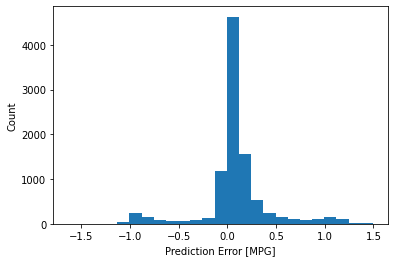

In [35]:
test_predictions = model.predict(X_test).flatten()

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")